In [1]:
import torch
import torchvision
import numpy as np
import laspy
import matplotlib.pyplot as plt
from util import project_point_cloud

%config InlineBackend.figure_formats = 'svg'
# %matplotlib widget

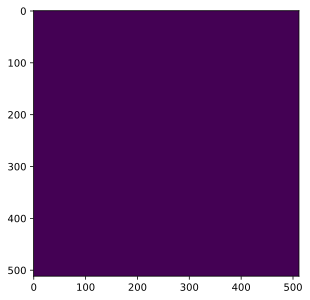

In [2]:
def las_to_pc(las, hide_class_10=True):
    mask = las.classification != (10 if hide_class_10 else -1)
    x = (las.points.X * las.header.scale[0] + las.header.offset[0])[mask]
    y = (las.points.Y * las.header.scale[1] + las.header.offset[1])[mask]
    z = (las.points.Z * las.header.scale[2] + las.header.offset[2])[mask]
    pc = torch.tensor(np.array([x, y, z]).T, dtype=float)
    classes = torch.tensor(las.classification[mask], dtype=int)
    return pc, classes

example = laspy.read('../data/MpalaForestGEO_LasClippedtoTreePolygons/treeID_41453.las')
pc, classes = las_to_pc(example)

x = project_point_cloud(pc)
plt.imshow(x, interpolation='none')

In [22]:
def project_to_image(point_cloud, p):
    """ Projects a 3D point cloud to 2D points for plotting

    :param point_cloud: 3D point cloud (3, N)
    :param p: Camera matrix (3, 4)

    :return: pts_2d: the image coordinates of the 3D points in the shape (2, N)
    """

    pts_2d = np.dot(p, np.append(point_cloud,
                                 np.ones((1, point_cloud.shape[1])),
                                 axis=0))

    pts_2d[0, :] = pts_2d[0, :] / pts_2d[2, :]
    pts_2d[1, :] = pts_2d[1, :] / pts_2d[2, :]
    pts_2d = np.delete(pts_2d, 2, 0)
    return pts_2d 

def project_pc_to_image(point_cloud, cam_p):
    """Projects a 3D point cloud to 2D points

    Args:
        point_cloud: (3, N) point cloud
        cam_p: camera projection matrix

    Returns:
        pts_2d: (2, N) projected coordinates [u, v] of the 3D points
    """

    pc_padded = np.append(point_cloud, np.ones((1, point_cloud.shape[1])), axis=0)
    pts_2d = np.dot(cam_p, pc_padded)

    pts_2d[0:2] = pts_2d[0:2] / pts_2d[2]
    return pts_2d[0:2] 


from transforms3d.euler import euler2mat
import torch
import numpy as np
from math import radians

example = laspy.read('../data/MpalaForestGEO_LasClippedtoTreePolygons/treeID_41453.las')
pc, classes = las_to_pc(example)
m = torch.tensor(euler2mat(radians(0), radians(-90), radians(0)))
p = torch.tensor([0, 250, 0])
p = torch.vstack((m, p))
p.shape
p
x = project_to_image(pc.T.numpy(), p.T)
x.shape
# plt.imshow(x, interpolation='none')

(2, 10240)

# Datautils

In [ ]:
# import datautils as dutils

# import numpy as np
# example = laspy.read('../data/MpalaForestGEO_LasClippedtoTreePolygons/treeID_41447.las')
# x = dutils.LASToPC()(example)
# x = dutils.PCRotate(axis=np.array([0, 0, 1]))(x.T).T
# x = dutils.PCRotatePerturbation()(x.T).T
# plot_pc(x, classes=None)
# pc, classes = las_to_pc(example)
# transforms = torchvision.transforms.Compose([
#     dutils.PCToTensor(),
#     # dutils.PCRotate(axis=np.array([1, 0, 0])),
#     dutils.PCScale(),
#     dutils.PCTranslate(),
#     dutils.PCJitter(),
# ])


# Model

https://github.com/isaaccorley/simpleview-pytorch/blob/main/simpleview_pytorch/simpleview.py

https://github.dev/princeton-vl/SimpleView/tree/master/ScanObjectNN/SimpleView

In [ ]:
def plot_pc(pc, classes, ax=None, **kwargs):
    if ax == None:
        ax = plt.axes(projection='3d')
        ax.view_init(0, 0)
    ax.scatter(pc[:,0], pc[:,1], pc[:,2], c=classes, cmap='hsv', **kwargs)

example = laspy.read('../data/MpalaForestGEO_LasClippedtoTreePolygons/treeID_41453.las')
pc, classes = las_to_pc(example)
plot_pc(pc, classes, s=0.1, alpha=0.75)
plt.show()
pc.shape

In [ ]:
from util import draw_point_cloud
x = draw_point_cloud(pc)
plt.imshow(x, interpolation='none')
# plt.savefig(f'test/test{i:03d}.png')
pc.shape

#### Scraps of code

In [ ]:
# import imageio
# images = []
# for filename in [f'test/test{i:03d}.png' for i in range(120)]:
#     images.append(imageio.imread(filename))
# imageio.mimsave('movie.gif', images)


In [ ]:
# preprocess = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])
# model = torchvision.models.resnet18(weights='ResNet18_Weights.DEFAULT')
# fake_batch = torch.randn((1, 6, 224, 224))
# fake_batch.shape
# model.eval()
# model(fake_batch)